# Star Wars Series Popularity Analysis

I am huge Star Wars fan and wonder often which one is the most popular one. There are a lot of surveys available over the internet which can help us find answer of the above question.  One such dataset is available at SurveyMonkey which is used for following analysis. 



In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
# star_wars['RespondentID'].dropna(axis=0, inplace=True)
# star_wars.shape


In [4]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.shape

(1186, 38)

In [5]:
import numpy as np
yes_no={'Yes':True,'No':True}
for col in star_wars.columns[1:3]:
    star_wars[col]=star_wars[col].map(yes_no)
    


star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [6]:
type(star_wars)

pandas.core.frame.DataFrame

In [7]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                         

In [36]:
star_wars[star_wars.columns[3:9]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,NaN,NaN,NaN,NaN,True,True
2,False,False,False,False,False,False
3,NaN,NaN,NaN,False,False,False
4,NaN,NaN,NaN,NaN,True,True
5,NaN,NaN,NaN,NaN,True,True
6,NaN,NaN,NaN,NaN,True,True
7,NaN,NaN,NaN,NaN,True,True
8,NaN,NaN,NaN,NaN,True,True
9,NaN,NaN,NaN,NaN,True,True
10,False,NaN,False,False,False,False


In [8]:
#Changing columns 3 to 8 into boolean
true_false={'Star Wars: Episode I The Phantom Menace':True,
            'Star Wars: Episode VI Return of the Jedi':True, 
            'Star Wars: Episode II Attack of the Clones': True, 
            'Star Wars: Episode III Revenge of the Sith': True , 
            'Star Wars: Episode IV A New Hope':True, 
            'Star Wars: Episode V The Empire Strikes Back':True, 
            np.nan:False }
for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(true_false)
    
    



In [9]:
#Changing the column names to a more readable form
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})


In [10]:
#Changing the column names to a more readable form

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })




In [11]:

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)




# Ranking

Following chart shows the mean of the scores given by all the respondants. The lower to higher mean indicates most favorite to least favorite of all the movies which were part of the survey. 

In [12]:
star_wars[star_wars.columns[3:9]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
seen_1    513 non-null object
seen_2    615 non-null object
seen_3    636 non-null object
seen_4    579 non-null object
seen_5    1186 non-null bool
seen_6    1186 non-null bool
dtypes: bool(2), object(4)
memory usage: 48.6+ KB


<Container object of 6 artists>

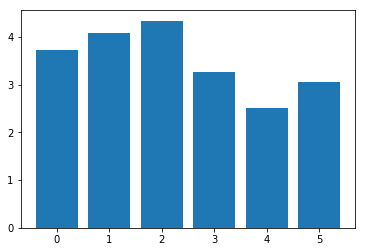

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.xlabel("Movies")
plt.ylabel("Score")
plt.show()



Above graph shows that movie with the lowest score is mos popular as we have given minimum score to the most favorite movie for each data point.

## Distribution based on Gender

Following graph depicts the popularity of various Star War movies based on Gender

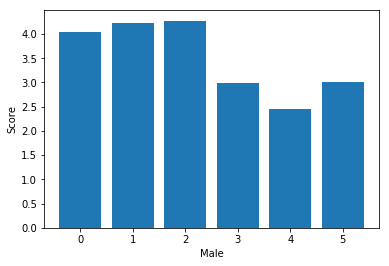

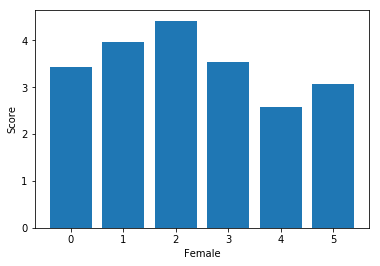

In [15]:
males=star_wars[star_wars['Gender']=='Male']
females=star_wars[star_wars['Gender']=='Female']


plt.bar(range(6),males[males.columns[9:15]].mean() )
plt.xlabel("Male")
plt.ylabel("Score")
plt.show()
plt.bar(range(6),females[females.columns[9:15]].mean() )
plt.xlabel("Female")
plt.ylabel("Score")
plt.show()





Earlier movies(at index 3,4 and 5) were more popular among both males and females but the same set of movies(3,4 and 5) seems more popular among men as compared to women.
